<a href="https://colab.research.google.com/github/Stella-Achar-Oiro/LP1-Data-Analysis-Project-2/blob/main/LP2_Corporation_Favorita_Step_By_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Sales Time Series Forecasting for Corporación Favorita

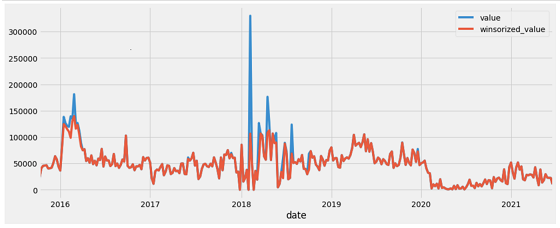

## Details
Name : Stella Achar Oiro <br>
email: stella.achar@azubiafrica.org <br>
Team: Prague <br>
Link to Github Repo - ([GitHub](https://github.com/Stella-Achar-Oiro/LP1-Data-Analysis-Project-2))
Project - Regression



# Intro
## Background
**The Goal** -  To optimize stock management at Corporation Favorita by accurately predicting demand for products in order to ensure that the right quantity of each product is always in stock.

<br>

**Description** - Corporation Favorita seeks to be informed on the stocks of products it should have at a particular point in time by analysing the demand trend of all of its products by consumers by using machine learning model forcast. The regression analysis will use past sales data to identify patterns in demand and develop a model that can accurately forecast future demand. This model will then be used to inform purchasing and stocking decisions, reducing the likelihood of stockouts and overstocking.
<br>

**Evaluation Metric** The the Root Mean Squared Log Error (RMSLE) will be used to evaluate the models.

**Data Description** 
- Train and test data consist of time series features store_nbr, family, and onpromotion as well as the target sales.
- Stores data - metadata, including city, state, type, and cluster.
- Oil data - daily oil price. 
- holidays_events - holidays and events with metadata.

# Research Questions and Hypothesis

The project adopts the following research hypothesis:

**1**

**Null Hypothesis:** The type of day does not play a significant role in determining the demand for oil


<br>

**Alternative Hypothesis:**  The type of day play a significant roles in determining the demand for oil.

<br>

**2**

**Null Hypothesis:** The location does not have an impact for the for the demand for oil

**Alternative Hypothesis:**  The location have an impact for the demand for oil

**3**

**Null Hypothesis:** There is no significant correlation between oil price and increase sales

**Alternative Hypothesis:** There is significant correlation between oil price and increase sales

##Research Questions:
The project will attempt to answer the following questions:

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Are certain groups of stores selling more products? (Cluster, city, state, type)

4. Are sales affected by promotions, oil prices and holidays?

5. What analysis can we get from the date and its extractable features?

6. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

7. What is the relationship between oil prices and sales?

8. What is the relationship between product and sales?

9. What is the trend of sales overtime ?

10. What is the relationship between oil prices and promotion ?

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Library for EDA
import pandas as pd
import numpy as np 
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv
from google.colab import drive
drive.mount('/content/drive')

#Loading all datasets
df_holidays = pd.read_csv('/content/drive/MyDrive/LP2/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/LP2/store-sales-time-series-forecasting/oil.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/LP2/store-sales-time-series-forecasting/stores.csv')
df_test = pd.read_csv('/content/drive/MyDrive/LP2/store-sales-time-series-forecasting/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/LP2/store-sales-time-series-forecasting/train.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/LP2/store-sales-time-series-forecasting/transactions.csv')

Mounted at /content/drive


# Exploratory Data Analysis: EDA

## Univariate Analysis

### Holiday and Events Data

In [3]:
# Cleaning the data and detecting possible outliers
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
# Check information about the dataframe 'df_holidays_events'
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [5]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_holidays_events'
df_holidays.shape

(350, 6)

In [6]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_holidays_events'
df_holidays.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [7]:
# Rename the 'locale_name' column to 'city' and the 'type' column to 'holiday_type' in the dataframe 'df_holidays_events'
# The changes are made in place (inplace=True)

df_holidays.rename(columns={'locale_name' : 'city', 'type' : 'holiday_type'}, inplace=True)

In [8]:
# Drop the 'description' column from the dataframe 'df_holidays_events'
df_holidays.drop(columns = 'description', inplace= True)

In [9]:
# Get the unique values of the 'holiday_type' column in the dataframe 'df_holidays_events'
df_holidays['holiday_type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [10]:
# Count the occurrences of each unique value in the 'holiday_type' column in the dataframe 'df_holidays_events'
df_holidays['holiday_type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: holiday_type, dtype: int64

In [11]:
# Display the 'df_holidays_events' dataset
df_holidays

,date,holiday_type,locale,city,transferred
0,2012-03-02,Holiday,Local,Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,False
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,False
346,2017-12-23,Additional,National,Ecuador,False
347,2017-12-24,Additional,National,Ecuador,False
348,2017-12-25,Holiday,National,Ecuador,False


### Oil Data

In [12]:
# View the first 5 rows of the oil dataframe
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
# Check information about the dataframe 'df_oil'
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [14]:
# Get the no. of rows and columns in the oil dataset
df_oil.shape

(1218, 2)

In [15]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_oil'
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [16]:
# Count the number of missing (NaN) values in each column of the dataframe 'df_oil'
df_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [17]:
# Check the first and last date in the oil data
df_oil["date"].min(),df_oil["date"].max()

('2013-01-01', '2017-08-31')

### Stores Data

In [18]:
# Show the first 5 rows of the dataframe 'df_stores'
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [19]:
# Rename the 'type' column to 'store_type' in the dataframe 'df_stores'
df_stores.rename(columns={'type' : 'store_type'}, inplace=True)

In [20]:
# Check information about the dataframe 'df_stores'
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_nbr   54 non-null     int64 
 1   city        54 non-null     object
 2   state       54 non-null     object
 3   store_type  54 non-null     object
 4   cluster     54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [21]:
# Check for duplicates
df_stores.duplicated().sum()

0

In [22]:
# checking for null values
df_stores.isna().sum()

store_nbr     0
city          0
state         0
store_type    0
cluster       0
dtype: int64

### Train Data

In [23]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_train'
df_train.shape

(3000888, 6)

In [24]:
# Show the first 5 rows of the dataframe 'df_train'
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [25]:
# Check information about the dataframe 'df_train'
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [26]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_train'
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [27]:
# Count the number of duplicated rows in the dataframe 'df_train'
df_train.duplicated().sum()

0

In [28]:
# checking skewness and kurtosis in the train dataset

print(f"Skewness: {df_train['sales'].skew()}")
print(f"Kurtosis: {df_train['sales'].kurt()}")

Skewness: 7.358757818882655
Kurtosis: 154.5620923696481


### Test Data

In [29]:
# Display the first 5 rows of the 'df_test' dataframe
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [30]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_test'
df_test.shape

(28512, 5)

In [31]:
# Check information about the dataframe 'df_test'
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [32]:
# Count the number of missing (NaN) values in each column of the dataframe 'df_test'
df_test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [33]:
# Get the unique values of the 'family' column in the dataframe 'df_test'
df_test['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [34]:
# Count the occurrences of each unique value in the 'family' column in the dataframe 'df_test'
df_test['family'].value_counts()

AUTOMOTIVE                    864
HOME APPLIANCES               864
SCHOOL AND OFFICE SUPPLIES    864
PRODUCE                       864
PREPARED FOODS                864
POULTRY                       864
PLAYERS AND ELECTRONICS       864
PET SUPPLIES                  864
PERSONAL CARE                 864
MEATS                         864
MAGAZINES                     864
LIQUOR,WINE,BEER              864
LINGERIE                      864
LAWN AND GARDEN               864
LADIESWEAR                    864
HOME CARE                     864
HOME AND KITCHEN II           864
BABY CARE                     864
HOME AND KITCHEN I            864
HARDWARE                      864
GROCERY II                    864
GROCERY I                     864
FROZEN FOODS                  864
EGGS                          864
DELI                          864
DAIRY                         864
CLEANING                      864
CELEBRATION                   864
BREAD/BAKERY                  864
BOOKS         

In [35]:
# Generate descriptive statistics of the numerical columns in the dataframe 'df_test'
df_test.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [36]:
# checking skewness and kurtosis in test data

print(f"Skewness: {df_test['store_nbr'].skew()}")
print(f"Kurtosis: {df_test['store_nbr'].kurt()}")

Skewness: 0.0
Kurtosis: -1.200823469063875


### Transactions Data

In [37]:
# Show the first 5 rows of the dataframe 'df_transactions'
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [38]:
# Check the shape (number of rows, number of columns) of the dataframe 'df_transactions'
df_transactions.shape

(83488, 3)

In [39]:
# Check information about the dataframe 'df_transactions'
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [40]:
# Count the number of duplicated rows in the dataframe 'df_transactions'
df_transactions.duplicated().sum()

0

In [41]:
# Function to convert date column to datetime format
def to_dateTime(df):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

# List of dataframes to convert
dataframes = [df_transactions, df_holidays, df_oil, df_train, df_test]

# Loop through dataframes and convert 'date' column to datetime format
for df in dataframes:
    to_dateTime(df)

In [42]:
# Checking the datetime conversion on Train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [43]:
# combine the datasets on common columns

merged_data = pd.merge(df_train, df_transactions, on=['date', 'store_nbr'])

# Merge Holiday data to previous merged data on date column
merged_data2 = pd.merge(merged_data, df_holidays, on='date')

# Merge Oil data to previous merged data on date column
merged_data3 = pd.merge(merged_data2, df_oil, on='date')

# Merge Store data to previous merged data on store_nbr column

merged_data4 = pd.merge(merged_data3, df_stores, on='store_nbr')

# Preview Merged data
merged_data4.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,city_x,transferred,dcoilwtico,city_y,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1


In [44]:
# Rename columns using the rename method
new_merged_data = merged_data4.rename(columns={"city_x": "locale_name", "city_y": "city"})

In [45]:
# Preview of new merged data - top 10
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1


In [46]:
# Datatypes of new merged data
new_merged_data.info()

# Inspect data for null values
new_merged_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  transferred   322047 non-null  bool          
 11  dcoilwtico    300003 non-null  float64       
 12  city          322047 non-null  object        
 13  state         322047 non-null  object        
 14  store_type    322047 non-null  object        
 15  cluster       322

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
holiday_type        0
locale              0
locale_name         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
dtype: int64

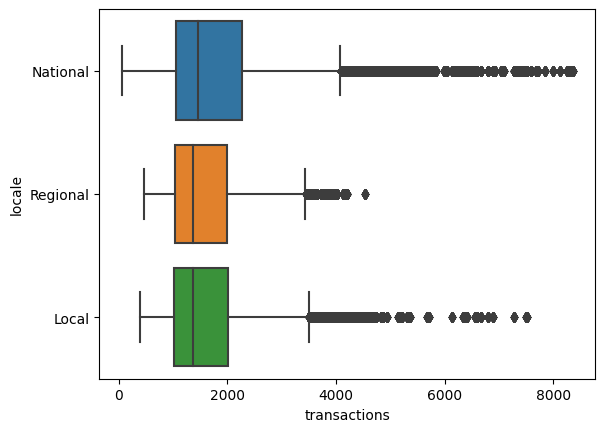

In [47]:
# New datatypes after changing date datatype as datetime
new_merged_data.shape

# # Generate summary statistics for numerical columns in the DataFrame
new_merged_data.describe()

# Finding duplicated valuew
new_merged_data.duplicated().sum()

# Convert dataset to CSV 
new_merged_data.to_csv('new_merged_data.csv', index=False)

# Create a boxplot of the 'transactions' column grouped by 'locale'
sns.boxplot(x='transactions', y='locale', data=new_merged_data)

# Show the plot
plt.show()

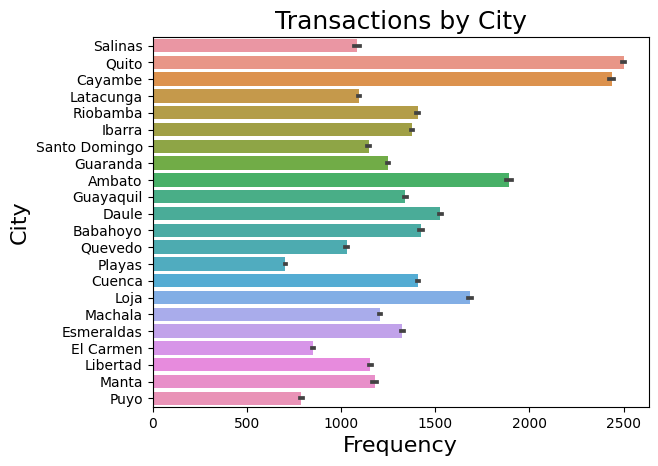

In [48]:
# Create the boxplot using the Seaborn library 
sns.barplot(x='transactions', y='city', data=new_merged_data)


width=0.5,  # Adjust the width of the boxes
fliersize=3, # Adjust the size of the outliers
showmeans=True, # Show the mean value
meanline=True, # Show a line for the mean
notch=True, # Make the boxes "notched"

# Add a title and labels for the x and y axis
plt.title("Transactions by City", fontsize=18)
plt.xlabel("Frequency", fontsize=16)
plt.ylabel("City", fontsize=16)

# Show the plot
plt.show()

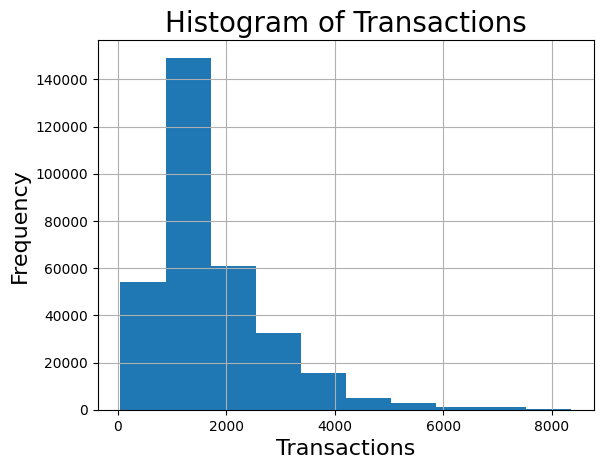

In [49]:
# Create a histogram of the 'transactions' column
new_merged_data.transactions.hist()

# Add labels to the x-axis, y-axis, and title
plt.xlabel('Transactions', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Transactions', fontsize=20)

# Show the plot
plt.show()

## Multivariate Analysis

                    id  store_nbr     sales  onpromotion  transactions  \
id            1.000000   0.013728  0.061237     0.181707     -0.018267   
store_nbr     0.013728   1.000000  0.051349     0.025992      0.171946   
sales         0.061237   0.051349  1.000000     0.418029      0.203691   
onpromotion   0.181707   0.025992  0.418029     1.000000      0.038163   
transactions -0.018267   0.171946  0.203691     0.038163      1.000000   
dcoilwtico   -0.836786  -0.010286 -0.062568    -0.133799     -0.017944   
cluster      -0.018880  -0.075667  0.033868     0.005895      0.188876   

              dcoilwtico   cluster  
id             -0.836786 -0.018880  
store_nbr      -0.010286 -0.075667  
sales          -0.062568  0.033868  
onpromotion    -0.133799  0.005895  
transactions   -0.017944  0.188876  
dcoilwtico      1.000000  0.021655  
cluster         0.021655  1.000000  


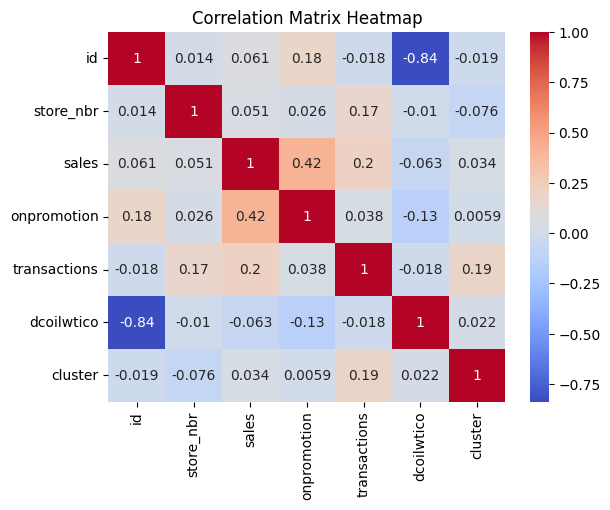

In [50]:
# create a dataframe with numerical columns only
numerical_df = new_merged_data.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr_matrix = numerical_df.corr()

# display the correlation matrix
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
#change date datatype as datetime to create new features

new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')

###**Research Questions**
1. Is the train dataset complete (has all the required dates)?

In [52]:
# Check for missing values
if df_train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")

# Check for missing dates in a time-series dataset
if not df_train.index.is_unique:
  print("The dataset is not complete. There are duplicate dates.")
else:
  print("The dataset is complete.")

The dataset is complete.


2. Which dates have the lowest and highest sales for each year?

   year   date_min   date_max
0  2013 2013-01-01 2013-11-12
1  2014 2014-01-01 2014-12-08
2  2015 2015-01-01 2015-11-11
3  2016 2016-02-08 2016-05-02
4  2017 2017-01-02 2017-01-02


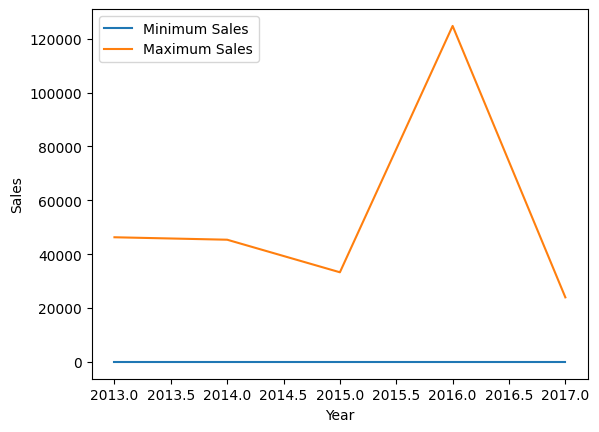

In [53]:
# Group the data by year and get the minimum and maximum sales for each year
grouped_by_year = new_merged_data.groupby("year")["sales"].agg(["min", "max"])

# Get the dates corresponding to the minimum and maximum sales for each year
result = pd.concat([new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "min"]][["year", "date"]].rename(columns={"date": "date_min"}) for year in grouped_by_year.index] +
                  [new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "max"]][["year", "date"]].rename(columns={"date": "date_max"}) for year in grouped_by_year.index])

# Set the index to be the year
result = result.set_index("year")

# Group the data by year to get the minimum and maximum sales on separate rows
result = result.groupby(level=0).agg({"date_min": "first", "date_max": "first"})

# Reset the index to get a regular dataframe
result = result.reset_index()

print(result)

# Group the data by year and get the minimum and maximum sales for each year
grouped_by_year = new_merged_data.groupby("year")["sales"].agg(["min", "max"])

# Get the dates corresponding to the minimum and maximum sales for each year
result = pd.concat([new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "min"]][["year", "date"]].rename(columns={"date": "date_min"}) for year in grouped_by_year.index] +
                  [new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "max"]][["year", "date"]].rename(columns={"date": "date_max"}) for year in grouped_by_year.index])

# Set the index to be the year
result = result.set_index("year")

# Group the data by year to get the minimum and maximum sales on separate rows
result = result.groupby(level=0).agg({"date_min": "first", "date_max": "first"})

# Reset the index to get a regular dataframe
result = result.reset_index()

# Plot the minimum and maximum sales for each year
plt.plot(result["year"], grouped_by_year["min"], label="Minimum Sales")
plt.plot(result["year"], grouped_by_year["max"], label="Maximum Sales")

# Add a legend
plt.legend()

# Add axis labels
plt.xlabel("Year")
plt.ylabel("Sales")

# Show the plot
plt.show()

3. Are certain groups of stores selling more products? (Cluster, city, state, type)

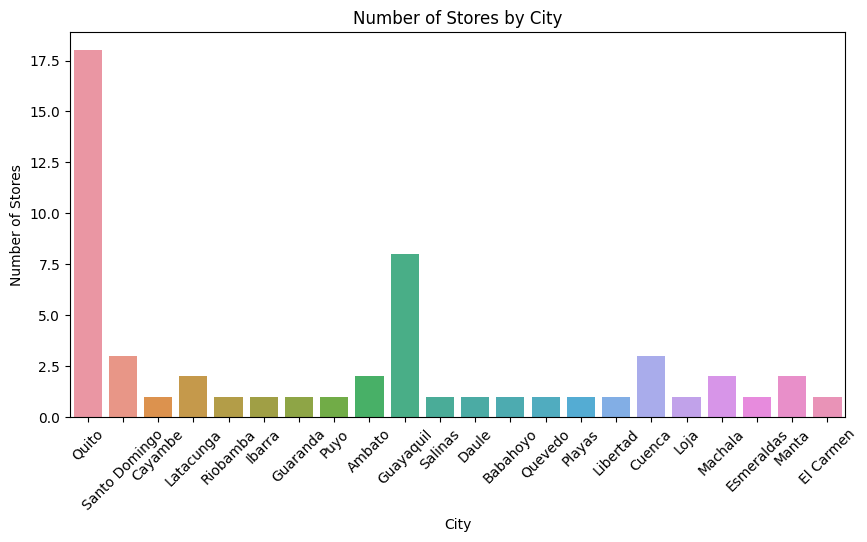

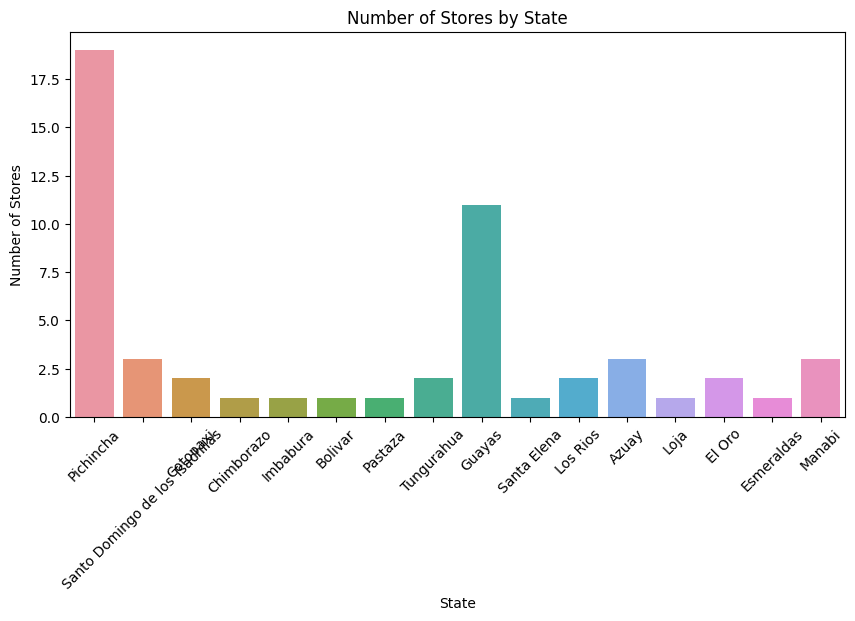

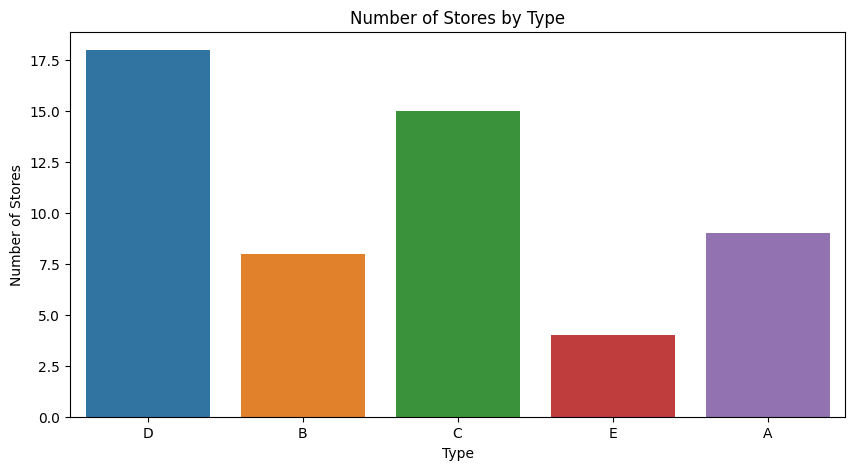

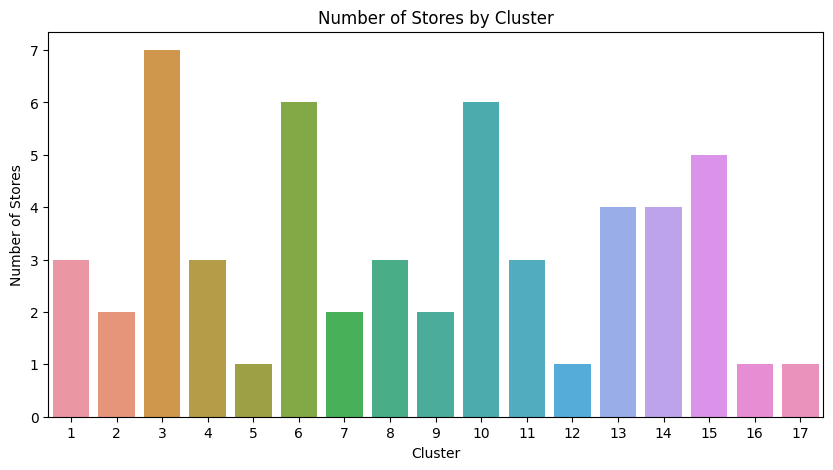

In [54]:
#display random sample of 5 rows
df_stores.sample(5, random_state = 0)

# Plot the number of stores by city
plt.figure(figsize=(10, 5))
sns.countplot(x='city', data=df_stores)

# Add title and labels
plt.title("Number of Stores by City")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by state
plt.figure(figsize=(10, 5))
sns.countplot(x='state', data=df_stores)

# Add title and labels
plt.title("Number of Stores by State")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by type
plt.figure(figsize=(10, 5))
sns.countplot(x='store_type', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Type")
plt.xlabel("Type")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()


5. What analysis can we get from the date and its extractable features?

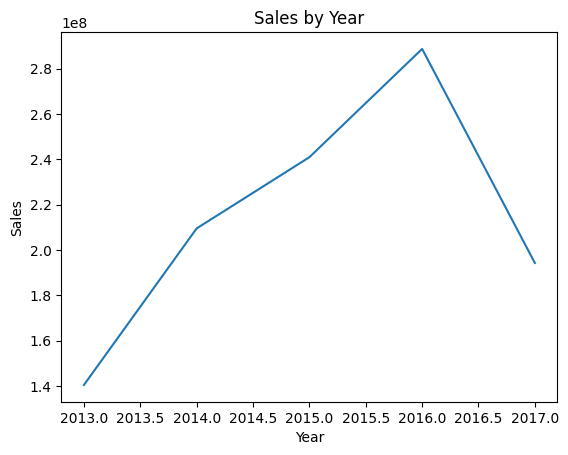

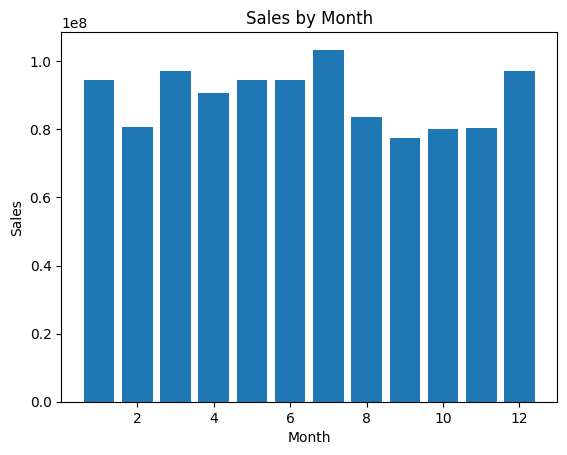

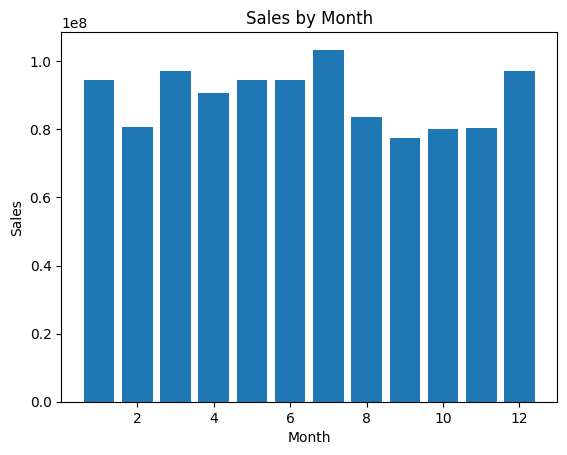

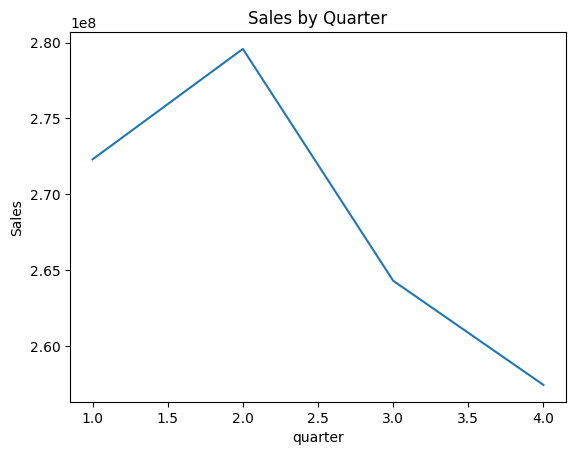

In [55]:
# create a copy of the dataframe
df_train_copy = df_train.copy()


# extract year, quarter, month, day, and weekday information from the date column
df_train_copy['year'] = df_train_copy['date'].dt.year
df_train_copy['quarter'] = df_train_copy['date'].dt.quarter
df_train_copy['month'] = df_train_copy['date'].dt.month
df_train_copy['day'] = df_train_copy['date'].dt.day
df_train_copy['weekday'] = df_train_copy['date'].dt.weekday

# group sales data by year
grouped_by_year = df_train_copy.groupby('year').sum()

# plot the aggregated sales data by year
plt.plot(grouped_by_year.index, grouped_by_year['sales'])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales by Year")
plt.show()

# group sales data by month
grouped_by_month = df_train_copy.groupby('month').sum()

# plot the aggregated sales data by month
plt.bar(grouped_by_month.index, grouped_by_month['sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.show()

# group sales data by month
grouped_by_month = df_train_copy.groupby('month').sum()

# plot the aggregated sales data by month
plt.bar(grouped_by_month.index, grouped_by_month['sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.show()


# group sales data by year
grouped_by_quarter = df_train_copy.groupby('quarter').sum()

# plot the aggregated sales data by quarter
plt.plot(grouped_by_quarter.index, grouped_by_quarter['sales'])
plt.xlabel("quarter")
plt.ylabel("Sales")
plt.title("Sales by Quarter")
plt.show()

7. What is the relationship between oil prices and sales?

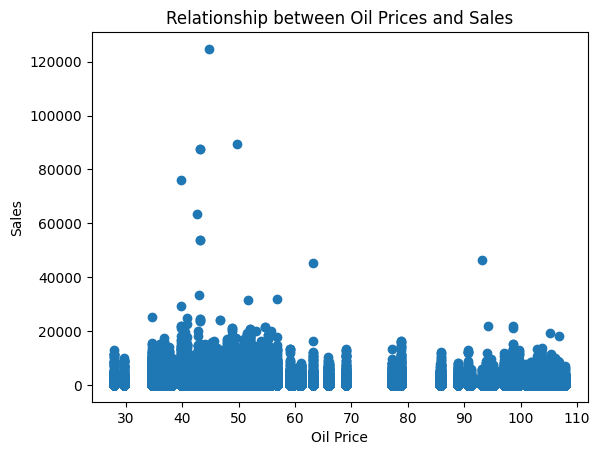

In [56]:
# Plot a scatter plot to visualize the relationship between oil prices and sales
plt.scatter(new_merged_data['dcoilwtico'], new_merged_data['sales'])
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Relationship between Oil Prices and Sales')
plt.show()

8. What is the relationship between product and sales?

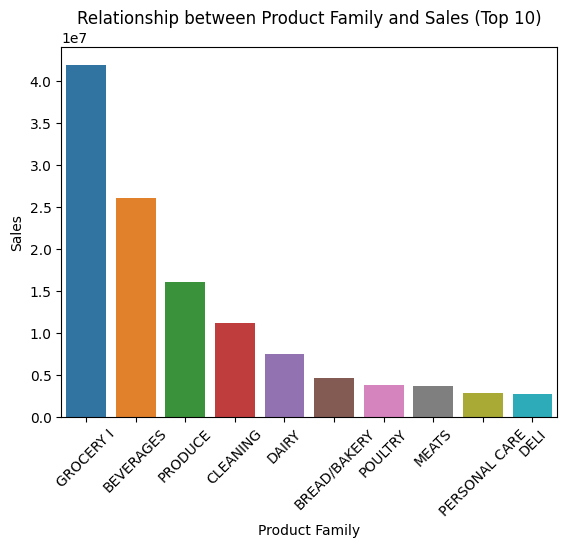

In [57]:
# Group data by product family and sum the sales
grouped_data_1 = new_merged_data.groupby('family').sum()['sales']

# Sort the data by sales
grouped_data_1 = grouped_data_1.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=grouped_data_1.index[:10], y=grouped_data_1.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

9. What is the trend of sales overtime

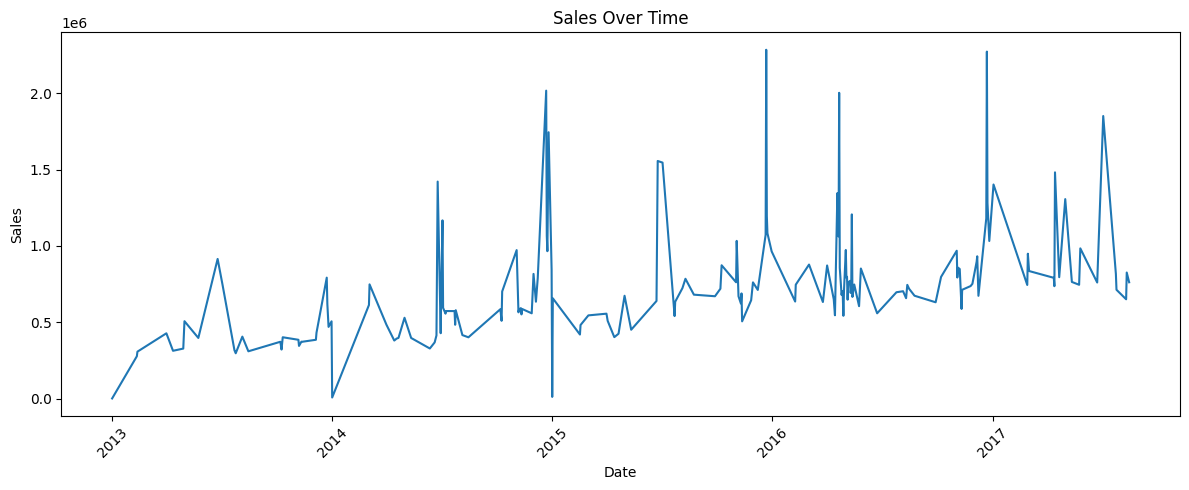

In [58]:
# Group data by date and sum the sales
date_group = new_merged_data.groupby("date").sum()

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group["sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [59]:
#checking duplicates in the train data
new_merged_data.duplicated().sum()

0

In [60]:
# Drop the specified columns
new_merged_data = new_merged_data.drop(columns=["year", "month", "dayofmonth", "dayofweek", "dayname"])

new_merged_data

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.000,0,770,Holiday,National,Ecuador,False,NaN,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000685,2017-08-15,52,POULTRY,397.340,0,2255,Holiday,Local,Riobamba,False,47.57,Manta,Manabi,A,11
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,Local,Riobamba,False,47.57,Manta,Manabi,A,11
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,Local,Riobamba,False,47.57,Manta,Manabi,A,11
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,2255,Holiday,Local,Riobamba,False,47.57,Manta,Manabi,A,11


## Impute Missing Values

In [62]:
from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class with mean strategy
imputer = SimpleImputer(strategy='mean')

# fit the imputer to the dcoilwtico column of new_merged_data
imputer.fit(new_merged_data[['dcoilwtico']])

# use the imputer to transform the dcoilwtico column of new_merged_data, replacing missing values with the mean value
new_merged_data['dcoilwtico'] = imputer.transform(new_merged_data[['dcoilwtico']])

# Preview data columns after imputing
new_merged_data.isnull().sum()

# Write the DataFrame to a CSV file
new_merged_data.to_csv('new_merged_data.csv', index=False)

#drop unnecessary columns
final_data = new_merged_data.drop(columns=['id','locale', 'locale_name', 'transferred'], inplace=True)

# set the date column as the index
new_merged_data.set_index('date', inplace=True)

# drop more columns

final_data = new_merged_data.drop(columns=['state',  'store_type', 'dayname'], inplace=True)

final_data = new_merged_data.copy()

final_data.head()

,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,cluster,year,month,dayofmonth,dayofweek
date,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BABY CARE,0.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BEAUTY,2.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BOOKS,0.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1


In [63]:
# categorizing the products
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
final_data['family'] = np.where(final_data['family'].isin(food_families), 'FOODS', final_data['family'])
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
final_data['family'] = np.where(final_data['family'].isin(home_families), 'HOME', final_data['family'])
clothing_families = ['LINGERIE', 'LADYSWARE']
final_data['family'] = np.where(final_data['family'].isin(clothing_families), 'CLOTHING', final_data['family'])
grocery_families = ['GROCERY I', 'GROCERY II']
final_data['family'] = np.where(final_data['family'].isin(grocery_families), 'GROCERY', final_data['family'])
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
final_data['family'] = np.where(final_data['family'].isin(stationery_families), 'STATIONERY', final_data['family'])
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
final_data['family'] = np.where(final_data['family'].isin(cleaning_families), 'CLEANING', final_data['family'])
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']
final_data['family'] = np.where(final_data['family'].isin(hardware_families), 'HARDWARE', final_data['family'])

## New Features Creation

In [61]:
#change date datatype as datetime to create new features

new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')

# Preview data with new features
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


## Features Encoding




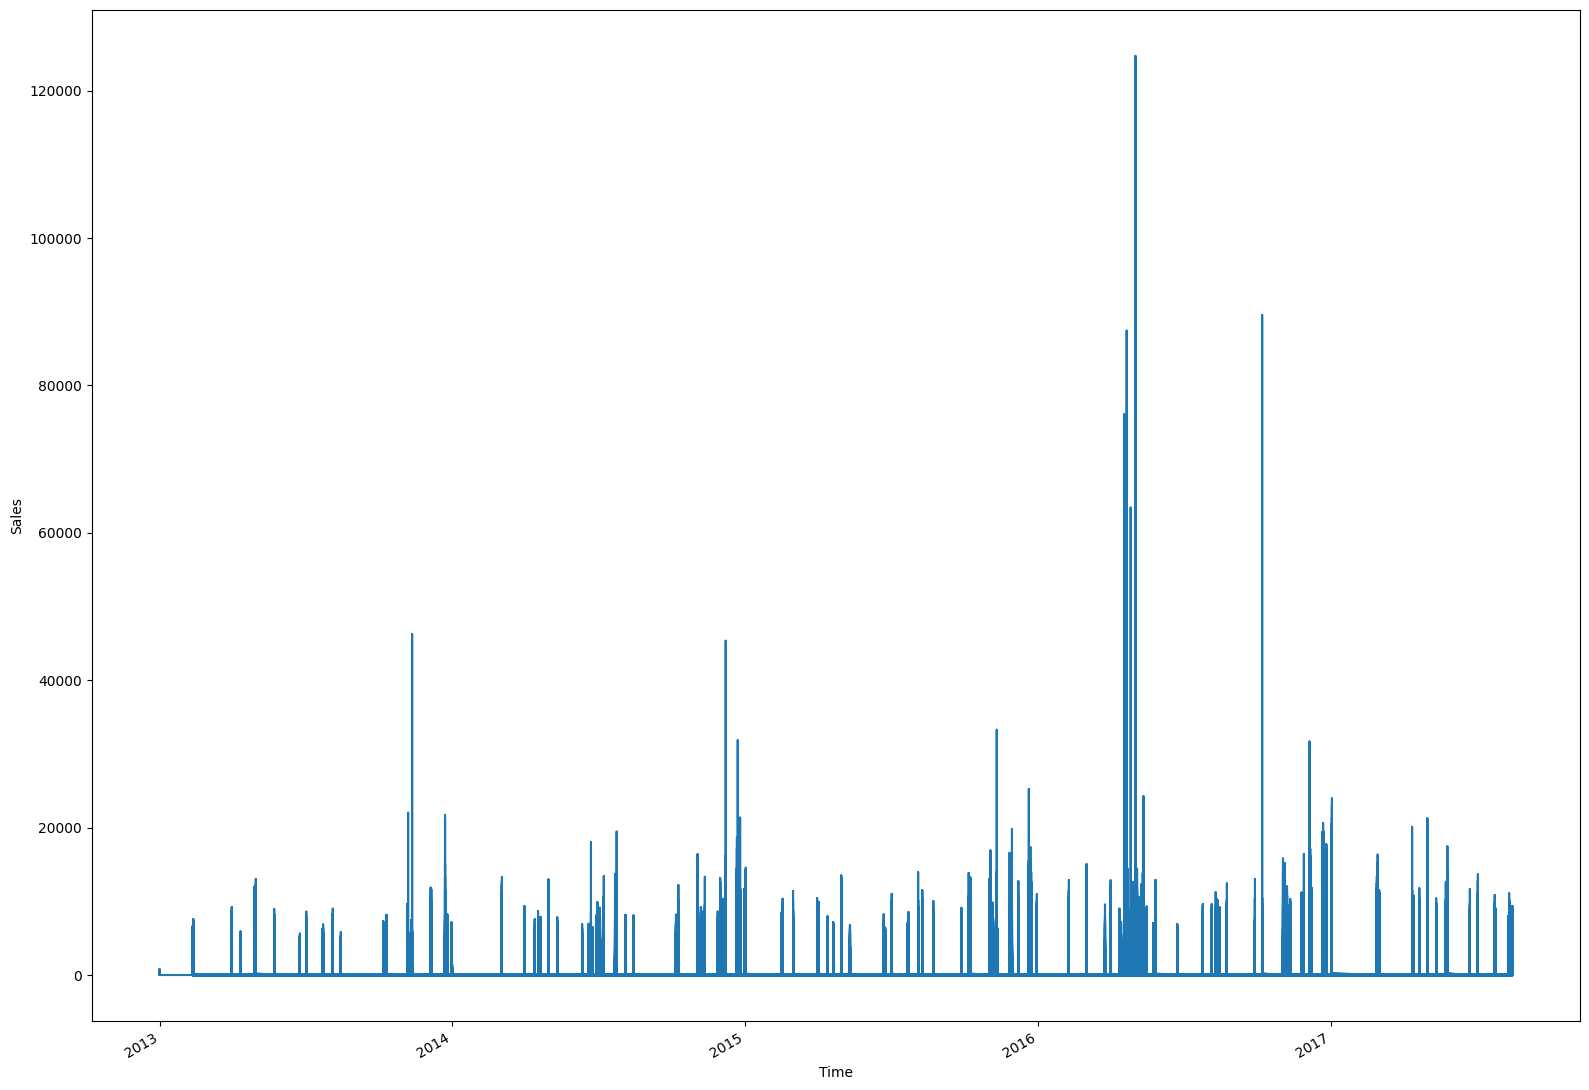

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = final_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data to one hot encoding
one_hot_encoded_data = encoder.fit_transform(categorical_data)

# Get the categories for each column
categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

# Create the column names for the one hot encoded data
column_names = []
for i in range(len(categories)):
    for j in range(len(categories[i])):
        column_names.append(f'{categorical_columns[i]}_{categories[i][j]}')

# Convert the one hot encoding data to a DataFrame
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)


# Reset the index of both dataframes
final_data = final_data.reset_index(drop=True)
one_hot_encoded_data = one_hot_encoded_data.reset_index(drop=True)

# Concatenate the original dataframe with the one hot encoded data
final_data_encoded = pd.concat([final_data, one_hot_encoded_data], axis=1)

# Drop the original categorical columns
final_data_encoded.drop(categorical_columns, axis=1, inplace=True)

#Rename dcoilwtico column to oil price
final_data_encoded.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

# Make a copy of the final_data_encoded as data
data = final_data_encoded.copy()

data.head()

fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(new_merged_data['sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
fig.autofmt_xdate()
plt.tight_layout()

# Write the DataFrame to a CSV file
data.to_csv('encoded_data.csv', index=False)

## Dataset Splitting

In [134]:
# Use train_test_split with a random_state, and add stratify for Classification

In [65]:
# Split Data to train and Test
from sklearn.model_selection import train_test_split

# Create the feature dataframe using the selected columns
X = data.drop(["sales"], axis=1)

# Get the target variable
y = data.sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Features Scaling


In [66]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico', 'year', 'month', 'dayofmonth', 'dayofweek']

# fit and transform the numerical columns
final_data[num_cols] = scaler.fit_transform(final_data[num_cols])

## Optional: Train Dataset Balancing 

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

### Create, train and evaluate Linear Regression Model

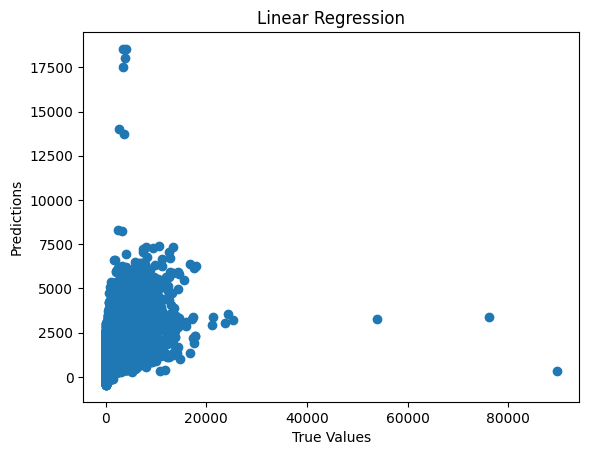


Evaluation Results for Linear Regression:
MSE: 1120652.96
RMSE: 1058.61
RMSLE: 3.16


In [67]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)

plt.scatter(y_test, lr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.show()

# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("RMSLE:", lr_rmsle)


### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

### Create, train and evaluate Decision Tree Model

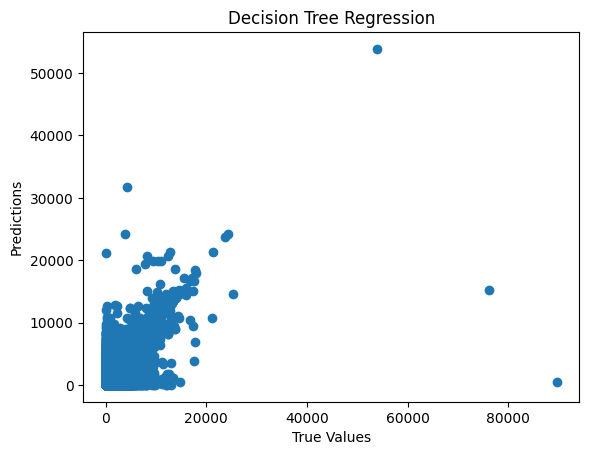


Evaluation Results for Decision Tree Regression:
MSE: 904437.33
RMSE: 951.02
RMLSE: 1.78


In [68]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_test)

plt.scatter(y_test, dt_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regression")
plt.show()

# Evaluation Metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
dt_predictions_abs = abs(dt_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and dt_predictions_abs array

dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)

# Print the evaluation results for Decision Tree Regression model
print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)

print("RMLSE:", dt_rmsle)

### Create, train and evaluate XGBoost Model

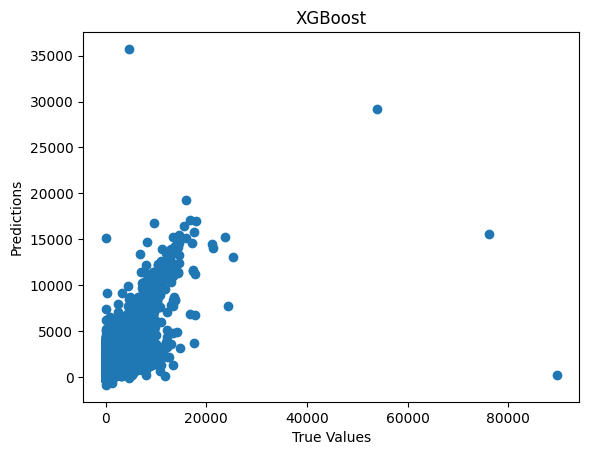


Evaluation Results for XGBoost:
MSE: 615424.98
RMSE: 784.49
RMSLE: 1.98


In [69]:
# XGBoost Model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

plt.scatter(y_test, xgb_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("XGBoost")
plt.show()

# Evaluation Metrics for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions).round(2)
xgb_rmse = np.sqrt(xgb_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
xgb_predictions_abs = abs(xgb_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and xgb_predictions_abs array

xgb_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, xgb_predictions_abs)).round(2)

# Print the evaluation results for XGBoost model
print("\nEvaluation Results for XGBoost:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("RMSLE:", xgb_rmsle)


### Create, train and evaluate Random Forest Model

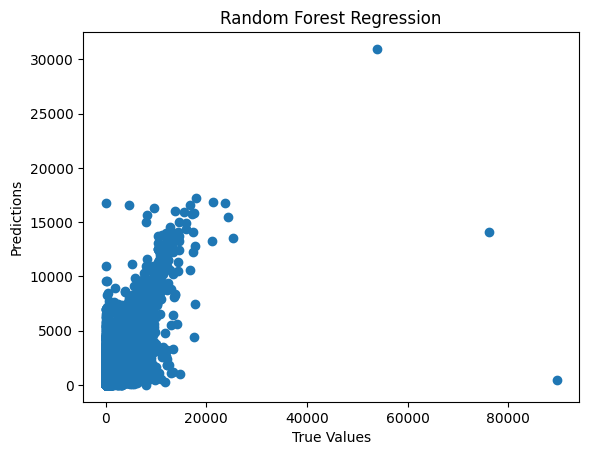


Evaluation Results for Random Forest:
MSE: 683730.49
RMSE: 826.88
RMSLE: 1.63


In [70]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
rf_predictions = rf.predict(X_test)

plt.scatter(y_test, rf_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression")
plt.show()

# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)
#rf_rmsle = np.sqrt(mean_squared_error(np.log(y_test), np.log(rf_predictions)))

# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
rf_predictions_abs = abs(rf_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array

rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

# Print the evaluation results for Random Forest Regrression model
print("\nEvaluation Results for Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("RMSLE:", rf_rmsle)

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method# 

# .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [71]:
# Create a table to compare the evaluation results
results_table = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree', 'XGBoost', 'Random Forest'],
                              'MSE': [lr_mse, dt_mse, xgb_mse, rf_mse],
                              'RMSE': [lr_rmse, dt_rmse, xgb_rmse, rf_rmse],
                              'RMSLE': [lr_rmsle, dt_rmsle, xgb_rmsle, rf_rmsle]})

# Print the comparison table
print("\nComparison Table of Evaluation Results:")
print(results_table)


Comparison Table of Evaluation Results:
               Model         MSE     RMSE  RMSLE
0  Linear Regression  1120652.96  1058.61   3.16
1      Decision Tree   904437.33   951.02   1.78
2            XGBoost   615424.98   784.49   1.98
3      Random Forest   683730.49   826.88   1.63


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [76]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt_params = {'max_depth': [5, 10, 15]}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_predictions = dt_best.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse).round(2)
dt_predictions_abs = abs(dt_predictions)
dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)
print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("RMSLE:", dt_rmsle)
print("Best parameters:", dt_grid.best_params_)





Evaluation Results for Decision Tree Regression:
MSE: 819031.96
RMSE: 905.0
RMSLE: 2.11
Best parameters: {'max_depth': 5}


# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [77]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=7e047b2a705676c90de1cf6a0d3e5f21aa0673cf7f526bae3d6794f26fd0ca03
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [78]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

import pickle
import streamlit as st
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error


# Load the data and split into train/test sets
# ...

# Fit the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(np.abs(y_test), np.abs(y_pred)))

# Save the key components in a dictionary
model_dict = {
    'model': model,
    'mse': mse,
    'rmse': rmse,
    'rmsle': rmsle,
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Save the dictionary using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

# Load the dictionary using pickle
with open('model.pkl', 'rb') as f:
    model_dict = pickle.load(f)

# Define the streamlit app
def app():
    # Create a sidebar for selecting options
    st.sidebar.title("Options")
    st.sidebar.markdown("Select the option to view:")
    options = ['Model', 'Data', 'Evaluation']
    selection = st.sidebar.selectbox("", options)

    # Show the selected option
    st.title(selection)

    # Show the model information
    if selection == 'Model':
        st.subheader("Decision Tree Regression Model")
        st.text(model_dict['model'])

    # Show the data
    elif selection == 'Data':
        st.subheader("Data")
        st.text("X_train")
        st.write(model_dict['X_train'])
        st.text("X_test")
        st.write(model_dict['X_test'])
        st.text("y_train")
        st.write(model_dict['y_train'])
        st.text("y_test")
        st.write(model_dict['y_test'])

    # Show the evaluation metrics
    elif selection == 'Evaluation':
        st.subheader("Evaluation Metrics")
        st.text("MSE")
        st.write(model_dict['mse'])
        st.text("RMSE")
        st.write(model_dict['rmse'])
        st.text("RMSLE")
        st.write(model_dict['rmsle'])

# Run the streamlit app
if __name__ == '__main__':
    app()


  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-10 06:52:19.428 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-10 06:52:19.442 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
